In [348]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install nltk
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudhirjoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [295]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [296]:
df.shape

(37249, 2)

In [297]:
df.sample()['clean_comment'].values

array(['self trolling'], dtype=object)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [299]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [300]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [301]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [302]:
df.dropna(inplace=True)

In [303]:
df.duplicated().sum()

350

In [304]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [305]:
df.drop_duplicates(inplace=True)

In [306]:
df[(df.clean_comment.str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [307]:
df = df[~(df.clean_comment.str.strip() == '')]
df.shape

(36793, 2)

In [308]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [309]:
# conver clean_Comment columns to lower case
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [310]:
# checking spaces before and after comments
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [311]:
# removing trailing and leading spaces before and after comments
df['clean_comment'] = df['clean_comment'].apply(lambda x: x.strip())

# verfy the transformation
df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' ')).sum()

0

In [312]:
# identifying the comments containing url 
url_pattern = re.compile(r'(https?://[^\s]+)') # URL pattern
df['clean_comment'].apply(lambda x: bool(url_pattern.search(x))).sum()

0

There is no url present in the dataset

In [313]:
# Remove new line charchters from the 'clean_comment' column
comments_with_new_line = df[df['clean_comment'].str.contains('\n')]
comments_with_new_line.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [314]:
df['clean_comment'] = df['clean_comment'].str.replace('\n',' ', regex=True)


# verfy the transformation
comments_with_new_line = df[df['clean_comment'].str.contains('\n')]
comments_with_new_line.head()

,clean_comment,category


## EDA

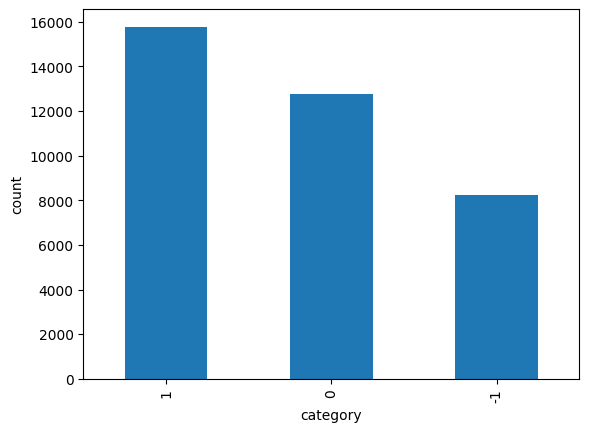

In [315]:
df['category'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.show()

In [316]:
df['category'].value_counts(normalize=True).mul(100).round(2)


category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [317]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [318]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

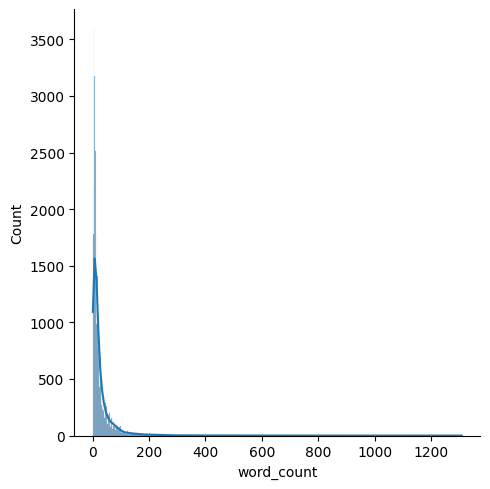

In [319]:
sns.displot(df['word_count'],kde = True)

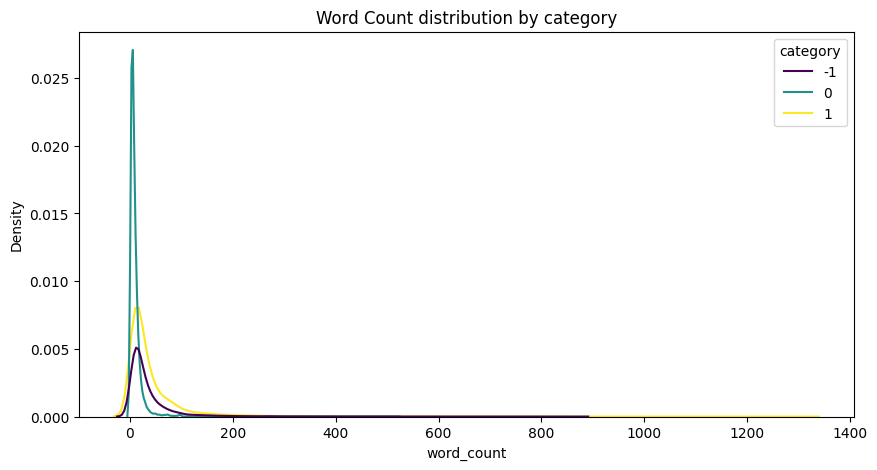

In [320]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x = 'word_count',hue= 'category', palette= 'viridis')
plt.title('Word Count distribution by category')
plt.show()


**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

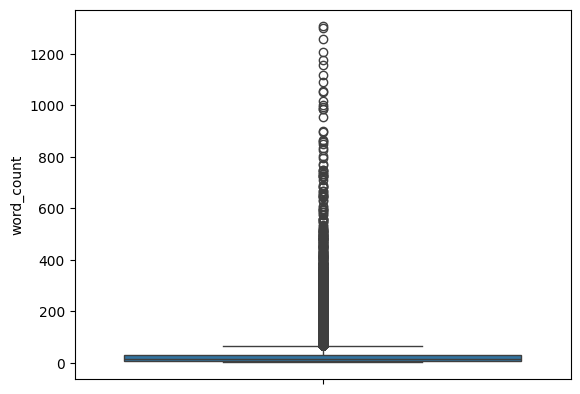

In [321]:
sns.boxplot(df['word_count'])

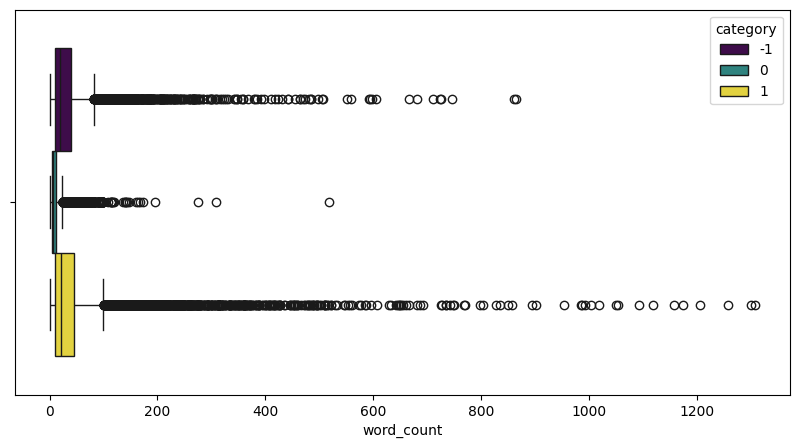

In [322]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'word_count', hue = 'category', palette= 'viridis')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

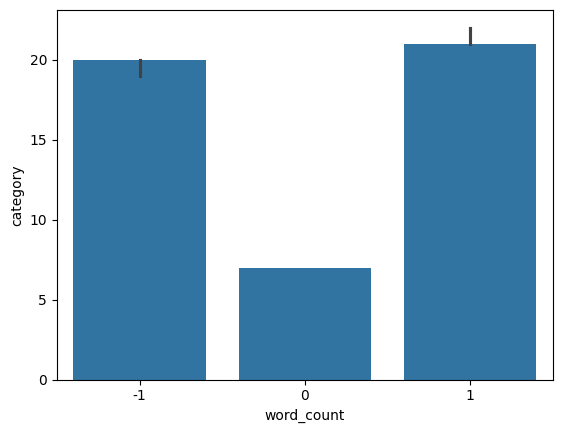

In [323]:
sns.barplot(df, x = 'category' , y = 'word_count', estimator='median')
plt.xlabel('word_count')
plt.ylabel('category')
plt.show()

In [324]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
df['stopwords_count'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
df.head()

,clean_comment,category,word_count,stopwords_count
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


In [325]:
from collections import Counter

# # Extract all stop words from clean_comment
# all_stop_words = [word for word in df['clean_comment'].str.split() if word in stop_words]
# all_stop_words

# Extract all stop words from clean_comment
all_stop_words = [word for comment in df['clean_comment'].str.split() 
                  for word in comment if word in stop_words]

# Count the frequency of stop words
stop_word_counts = Counter(all_stop_words)
print(stop_word_counts.most_common(25))

[('the', 57669), ('and', 28950), ('that', 15372), ('this', 13463), ('for', 12976), ('you', 11723), ('are', 10566), ('not', 8691), ('they', 8654), ('have', 8380), ('with', 7845), ('but', 7264), ('will', 6905), ('was', 6371), ('what', 5270), ('all', 5130), ('has', 5097), ('can', 5037), ('from', 4965), ('about', 4355), ('just', 4261), ('there', 4150), ('who', 4058), ('their', 3938), ('his', 3341)]


/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_6016/3348714654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_25_df, x = 'count', y ='stop_word', palette='viridis')


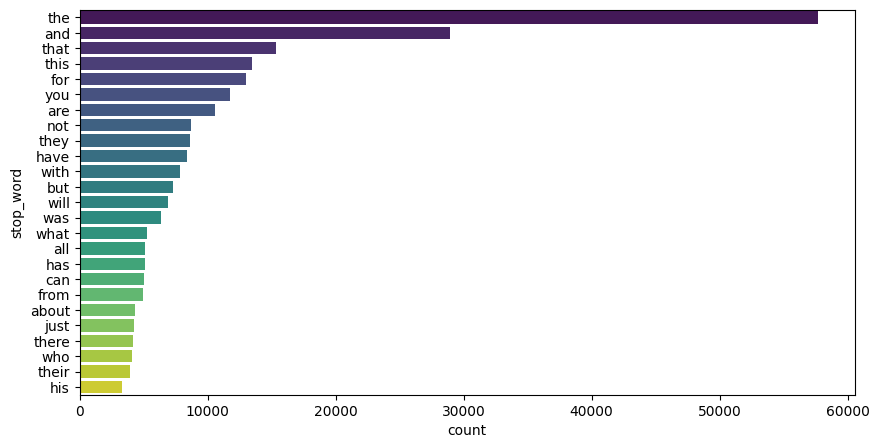

In [326]:
# Count the frequency of stop words
top_25_df = pd.DataFrame(stop_word_counts.most_common(25), columns=['stop_word','count'])
plt.figure(figsize=(10,5))
sns.barplot(top_25_df, x = 'count', y ='stop_word', palette='viridis')
plt.xlabel('count')
plt.ylabel('stop_word')
plt.show()


In [327]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,stopwords_count,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [328]:
df.num_chars.describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [329]:
all_text = ''.join(df['clean_comment'])
char_frequency = Counter(all_text) 
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['charachter','frequency']).sort_values(by='frequency', ascending=False)
char_frequency_df.head(25)

,charachter,frequency
6,,1054800
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [330]:
char_frequency_df.tail(25)

,charachter,frequency
1020,雪,1
1019,随,1
1018,留,1
1017,此,1
365,ط,1
776,坚,1
1014,照,1
1013,按,1
381,☐,1
995,理,1


In [331]:
# No of punctuation characters
punctuation_chars = df['clean_comment'].str.findall(r'[^\w\s]')
punctuation_chars_flat = [char for sublist in punctuation_chars if isinstance(sublist, list) for char in sublist]

# Count the frequency of punctuation characters
punctuation_counts = Counter(punctuation_chars_flat)
punctuation_counts.most_common(25)

[('’', 2314),
 ('ा', 772),
 ('“', 695),
 ('”', 665),
 ('े', 519),
 ('\\', 463),
 ('ी', 394),
 ('@', 366),
 ('ं', 325),
 ('ो', 305),
 ('्', 285),
 ('ि', 232),
 ('്', 188),
 ('️', 180),
 ('‘', 169),
 ('—', 164),
 ('ै', 163),
 ('±', 155),
 ('–', 136),
 ('ु', 127),
 ('，', 126),
 ('।', 95),
 ('ി', 90),
 ('…', 81),
 ('。', 77)]

In [332]:
# add punctuation_char count as a column in df 
df['punctuation_count'] = df['clean_comment'].apply(lambda x: len([char for char in x if char in punctuation_chars_flat]))
df.head()

KeyboardInterrupt: 

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_6016/3609725594.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_bigrams_df, x = 'frequency', y = 'bigram', palette='viridis')


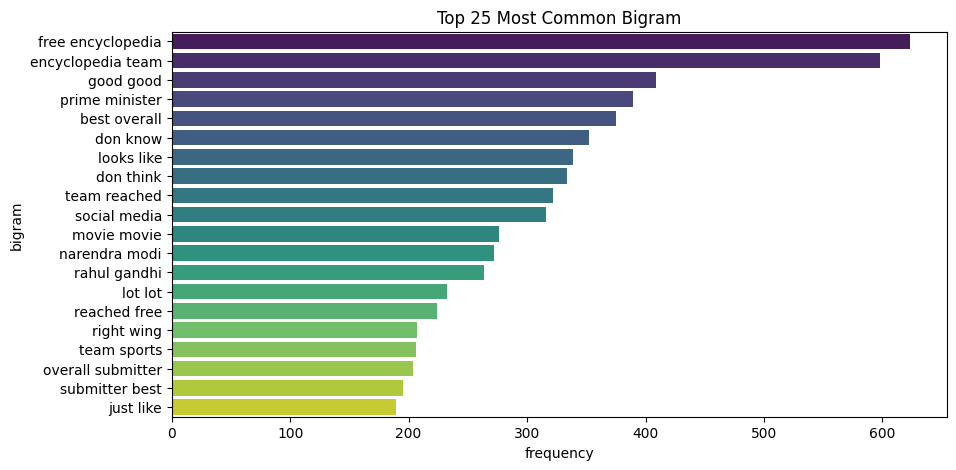

In [344]:
def get_top_ngrams(corpus, n = None):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 20 bigrams
top_bigrams = get_top_ngrams(df['clean_comment'], n=20)

#countplot top 20 bigrams
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'frequency'])
plt.figure(figsize=(10,5))
sns.barplot(top_bigrams_df, x = 'frequency', y = 'bigram', palette='viridis')
plt.title('Top 25 Most Common Bigram')
plt.xlabel('frequency')
plt.ylabel('bigram')
plt.show()

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_6016/1766034817.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_bigrams_df, x = 'frequency', y = 'bigram', palette='viridis')


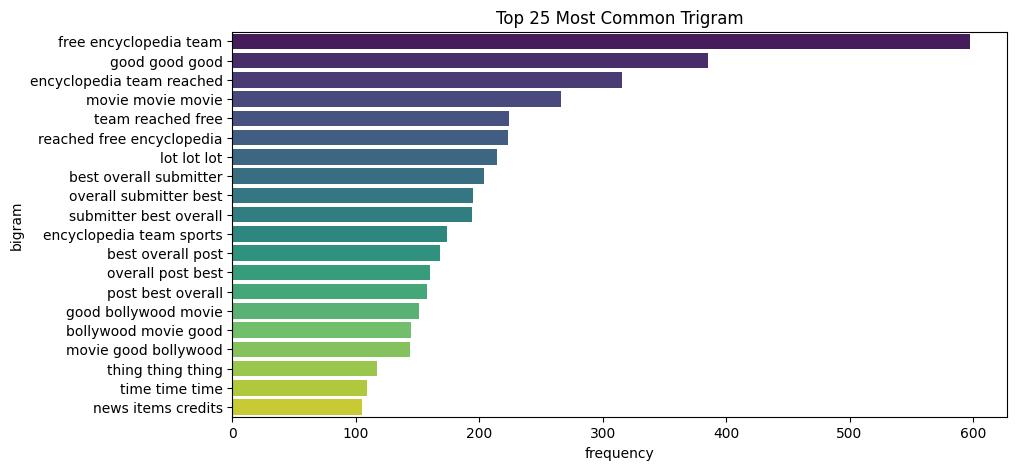

In [343]:
def get_top_ngrams(corpus, n = None):
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 20 bigrams
top_bigrams = get_top_ngrams(df['clean_comment'], n=20)

#countplot top 20 bigrams
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'frequency'])
plt.figure(figsize=(10,5))
sns.barplot(top_bigrams_df, x = 'frequency', y = 'bigram', palette='viridis')
plt.title('Top 25 Most Common Trigram')
plt.xlabel('frequency')
plt.ylabel('bigram')
plt.show()

In [347]:
# remove the special characters 
df['clean_comment'] = df['clean_comment'].str.replace('[^a-zA-Z0-9\s]', '')
# remove the stop words
df['clean_comment'] = df['clean_comment'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
# Lammitization
df['clean_comment'] = df['clean_comment'].apply(lambda x: " ".join(WordNetLemmatizer().lemmatize(word) for word in x.split()))
df.head()

,clean_comment,category,word_count,stopwords_count,num_chars
0,family mormon never tried explain still stare ...,1,39,13,259
1,buddhism much lot compatible christianity espe...,1,196,59,1268
2,seriously say thing first get complex explain ...,-1,86,40,459
3,learned want teach different focus goal wrappi...,0,29,15,167
4,benefit may want read living buddha living chr...,1,112,45,690


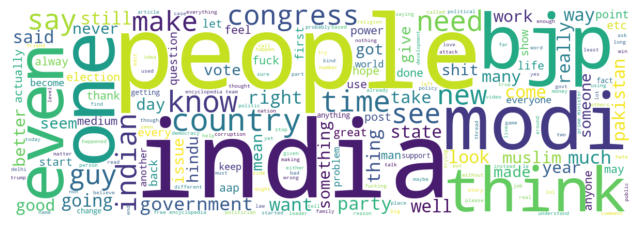

In [353]:
# wordcloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width = 1200, height = 400, 
                    background_color ='white', 
                    min_font_size = 10).generate(' '.join(df['clean_comment']))
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# plot word cloud for all comments
plot_word_cloud(all_text)

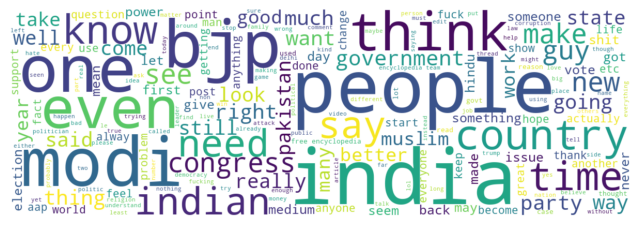

In [354]:
# plot word cloud for positive comments
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

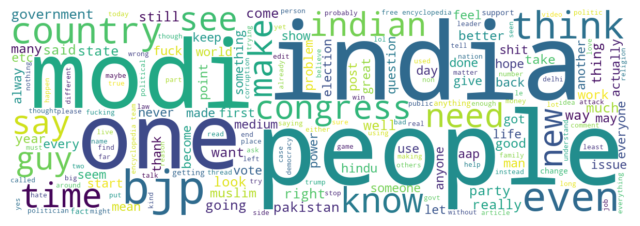

In [355]:
# plot word cloud for negative comments
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

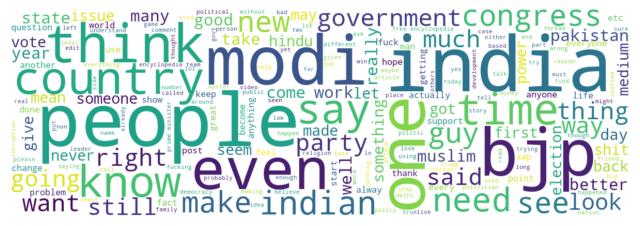

In [356]:
# plot word cloud for neutral comments
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_6016/3256194511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(most_common_words_df, x='count', y='word', palette='viridis')


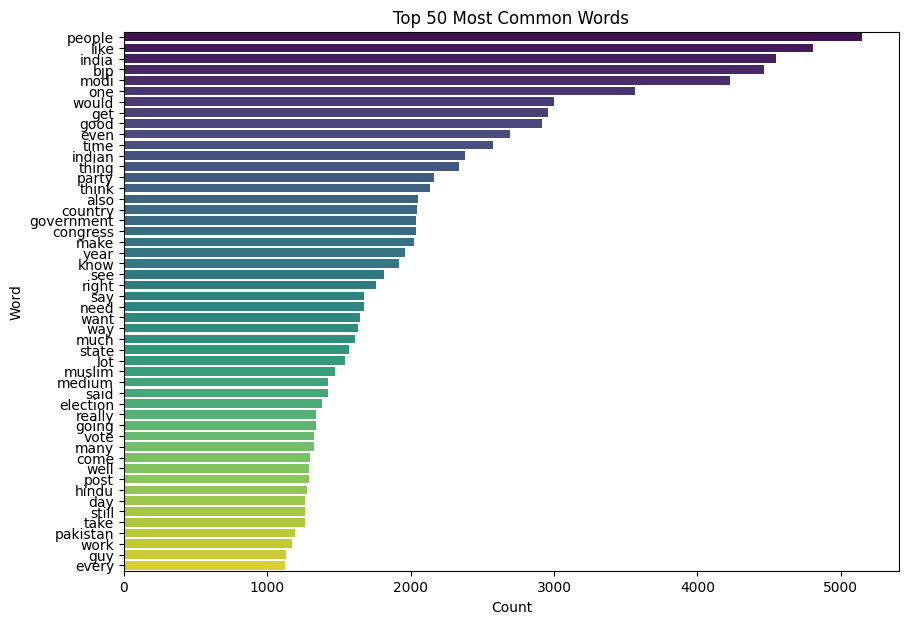

In [362]:
def plot_top_n_words(df, n= 20):
    words = ''.join(df['clean_comment']).split()

    # Convert list of words to a Counter object
    counter = Counter(words)
    
    # Get the most common words
    most_common_words = counter.most_common(n)

    # Create a dataframe from the most common words
    most_common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

    # Plot the most common words
    plt.figure(figsize=(10,7))
    sns.barplot(most_common_words_df, x='count', y='word', palette='viridis')
    plt.title('Top {} Most Common Words'.format(n))
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()


# plot top 20 most common words
plot_top_n_words(df, n=50)

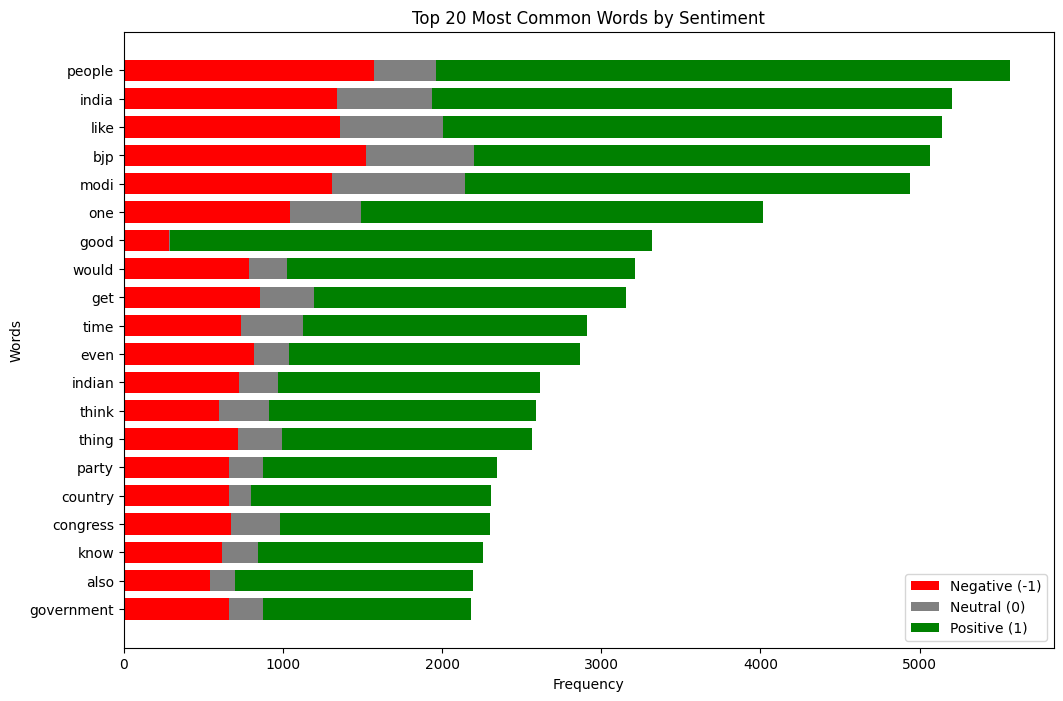

In [381]:

def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    word_category_count = {}
    for idx,row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_count:
                word_category_count[word] = {-1: 0, 0: 0, 1: 1}
            word_category_count[word][category] += 1

    # get total word across all categories
    total_word_count = {word:sum(counts.values()) for word, counts in word_category_count.items()}

    # get top N most frequent words across all categories
    most_common_word_count = sorted(total_word_count.items(), key = lambda x:x[1], reverse = True)[start:start + n]
    top_words = [word for word, _ in most_common_word_count]

    # preprare data for plotting
    word_labels = top_words 
    negative_counts = [word_category_count[word][-1] for word in top_words]
    positive_counts = [word_category_count[word][1] for word in top_words]
    neutral_counts = [word_category_count[word][0] for word in top_words]

    # plot the stacked barchart
    plt.figure(figsize=(12,8))
    bar_width = 0.75

    # plot negative, neutral and positive counts
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    # add legend
    plt.legend(loc='lower right')

    plt.title('Top {} Most Common Words by Sentiment'.format(n))

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()

# plot top 20 most common words by sentiment
plot_top_n_words_by_category(df, n=20)

